# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Matthew Alexander]
- **Email:** [m239b4ky2429@bangkit.academy]
- **ID Dicoding:** [matthew_alexander_sujanto_m239b4ky2429_NSPk]

## Menentukan Pertanyaan Bisnis

**1. Apa pola penggunaan sepeda berdasarkan cuaca (suhu, kelembapan, kecepatan angin) selama setahun?**

Menggunakan analisis harian untuk melihat bagaimana faktor cuaca mempengaruhi jumlah pengguna sepeda.

**2. Bagaimana penggunaan sepeda bervariasi di antara hari kerja dan hari libur?**

Menganalisis penggunaan sepeda pada hari kerja dan libur baik di dataset harian maupun jam-jam tertentu.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
from scipy import stats
import datetime as dt
import geopandas as gpd
import folium
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [6]:
hour_data = pd.read_csv("hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
day_data = pd.read_csv("day.csv")
day_data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

**Menilai Data Day**

In [23]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print(day_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [17]:
print(day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
print(day_data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [16]:
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(day_data[column].nunique())

4
2
12
2
7
2
3


**Menilai Data Hour**

In [24]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
print(hour_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [20]:
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
print(hour_data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [22]:
for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(hour_data[column].nunique())

4
2
12
2
7
2
4


**Insight:**
- xxx
- xxx

### Cleaning Data

**Day Data**

In [26]:

# 1. Dropping unnecessary columns
cleaned_data = day_data.drop(columns=['instant'])

# 2. Checking for missing values
missing_values = cleaned_data.isnull().sum()

# 3. Fixing Data Column
cleaned_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'cnt': 'total_users'
}, inplace=True)

# Displaying the cleaned data and any missing values
cleaned_data.head(), missing_values


(        date season year month is_holiday day_of_week is_workingday  \
 0 2011-01-01      1    0     1          0           6             0   
 1 2011-01-02      1    0     1          0           0             0   
 2 2011-01-03      1    0     1          0           1             1   
 3 2011-01-04      1    0     1          0           2             1   
 4 2011-01-05      1    0     1          0           3             1   
 
   weather_condition  temperature  feels_like_temp  humidity  windspeed  \
 0                 2     0.344167         0.363625  0.805833   0.160446   
 1                 2     0.363478         0.353739  0.696087   0.248539   
 2                 1     0.196364         0.189405  0.437273   0.248309   
 3                 1     0.200000         0.212122  0.590435   0.160296   
 4                 1     0.226957         0.229270  0.436957   0.186900   
 
    casual  registered  total_users  
 0     331         654          985  
 1     131         670          801  


**Hour Data**

In [27]:
# Data Cleaning

# 1. Dropping unnecessary columns
cleaned_data = hour_data.drop(columns=['instant'])

# 2. Checking for missing values
missing_values = cleaned_data.isnull().sum()

# 3. Fixing Data Column
cleaned_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'cnt': 'total_users'
}, inplace=True)

# Displaying the cleaned data and any missing values
cleaned_data.head(), missing_values


(         date  season  year  month  hour  is_holiday  day_of_week  \
 0  2011-01-01       1     0      1     0           0            6   
 1  2011-01-01       1     0      1     1           0            6   
 2  2011-01-01       1     0      1     2           0            6   
 3  2011-01-01       1     0      1     3           0            6   
 4  2011-01-01       1     0      1     4           0            6   
 
    is_workingday  weather_condition  temperature  feels_like_temp  humidity  \
 0              0                  1         0.24           0.2879      0.81   
 1              0                  1         0.22           0.2727      0.80   
 2              0                  1         0.22           0.2727      0.80   
 3              0                  1         0.24           0.2879      0.75   
 4              0                  1         0.24           0.2879      0.75   
 
    windspeed  casual  registered  total_users  
 0        0.0       3          13           16 

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

**Explore Day Data**

In [28]:
day_data.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
443,444,2012-03-19,1,1,3,0,1,1,1,0.545000,0.532821,0.728750,0.162317,982,5171,6153
358,359,2011-12-25,1,0,12,0,0,0,1,0.274783,0.279961,0.681304,0.155091,303,451,754
485,486,2012-04-30,2,1,4,0,1,1,2,0.464167,0.457696,0.570000,0.171638,665,4907,5572
513,514,2012-05-28,2,1,5,1,1,0,1,0.712500,0.679300,0.676250,0.196521,2557,3486,6043
496,497,2012-05-11,2,1,5,0,5,1,1,0.533333,0.520833,0.360417,0.236937,1319,5711,7030
683,684,2012-11-14,4,1,11,0,3,1,1,0.289167,0.281563,0.552083,0.199625,373,5122,5495
266,267,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647,5423
117,118,2011-04-28,2,0,4,0,4,1,2,0.617500,0.578929,0.700833,0.320908,569,3489,4058
101,102,2011-04-12,2,0,4,0,2,1,2,0.502500,0.493054,0.739167,0.274879,257,1777,2034
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [29]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Explore Hour Data**

In [30]:
hour_data.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5259,5260,2011-08-12,3,0,8,1,0,5,1,1,0.64,0.6212,0.53,0.1343,4,19,23
16996,16997,2012-12-15,4,1,12,23,0,6,0,2,0.36,0.3485,0.62,0.1343,11,108,119
10010,10011,2012-02-27,1,1,2,3,0,1,1,1,0.24,0.2424,0.75,0.1642,0,2,2
4121,4122,2011-06-25,3,0,6,15,0,6,0,1,0.74,0.6667,0.45,0.0000,157,235,392
11962,11963,2012-05-18,2,1,5,15,0,5,1,1,0.66,0.6212,0.36,0.1940,131,260,391
6316,6317,2011-09-25,4,0,9,18,0,0,0,1,0.68,0.6364,0.74,0.0000,125,279,404
7031,7032,2011-10-25,4,0,10,14,0,2,1,1,0.56,0.5303,0.40,0.2537,66,134,200
6042,6043,2011-09-14,3,0,9,8,0,3,1,1,0.62,0.5758,0.83,0.1642,33,396,429
14066,14067,2012-08-14,3,1,8,7,0,2,1,2,0.66,0.6061,0.83,0.0896,1,178,179
6759,6760,2011-10-14,4,0,10,5,0,5,1,2,0.56,0.5303,0.94,0.1642,0,17,17


In [ ]:
hour_data.describe(include="all")

**Menggabungkan kedua data**

In [35]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Merge datasets on 'dteday'
merged_df = pd.merge(day_data, hour_data, on='dteday', suffixes=('_day', '_hour'))

# Display the merged dataset
merged_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:

merged_df.to_csv("all_data.csv", index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:
## Apa pola penggunaan sepeda berdasarkan cuaca (suhu, kelembapan, kecepatan angin) selama setahun?

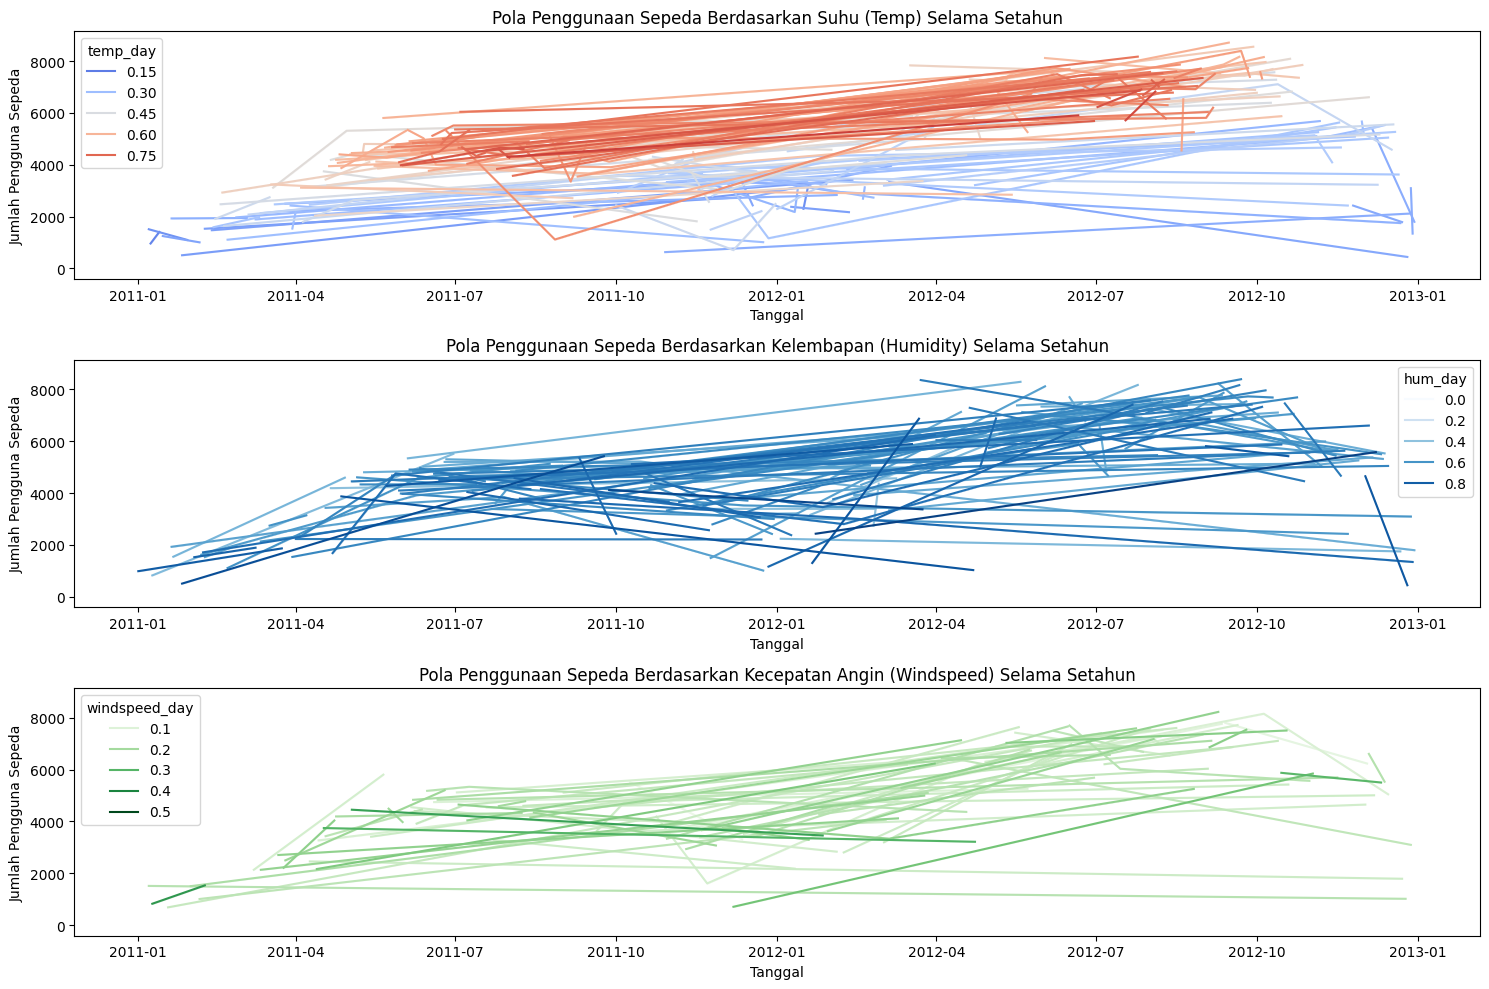

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Create a 3x1 grid of plots for temp, hum, and windspeed
plt.subplot(3, 1, 1)
sns.lineplot(x=merged_df['dteday'], y=merged_df['cnt_day'], hue=merged_df['temp_day'], palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Suhu (Temp) Selama Setahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Sepeda')

plt.subplot(3, 1, 2)
sns.lineplot(x=merged_df['dteday'], y=merged_df['cnt_day'], hue=merged_df['hum_day'], palette='Blues')
plt.title('Pola Penggunaan Sepeda Berdasarkan Kelembapan (Humidity) Selama Setahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Sepeda')

plt.subplot(3, 1, 3)
sns.lineplot(x=merged_df['dteday'], y=merged_df['cnt_day'], hue=merged_df['windspeed_day'], palette='Greens')
plt.title('Pola Penggunaan Sepeda Berdasarkan Kecepatan Angin (Windspeed) Selama Setahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Sepeda')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


### Pertanyaan 2:
## Bagaimana penggunaan sepeda bervariasi di antara hari kerja dan hari libur?

<ipython-input-38-4de589bbef02>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_grouped = day_data.groupby(['holiday', 'workingday']).agg({'cnt': 'mean'}).reset_index()


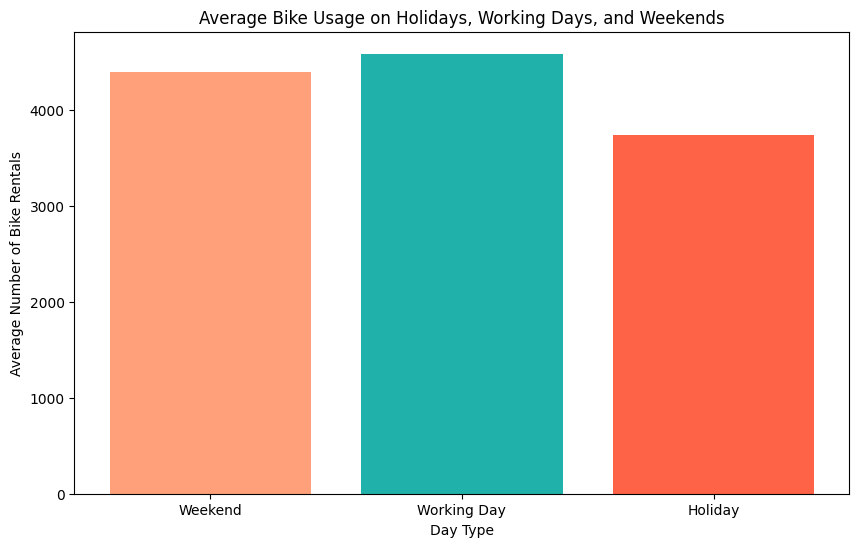

In [38]:
import matplotlib.pyplot as plt

# Group the data by holiday and workingday to analyze usage patterns on holidays vs working days
day_grouped = day_data.groupby(['holiday', 'workingday']).agg({'cnt': 'mean'}).reset_index()

# Define labels for holiday and working day
day_grouped['day_type'] = day_grouped.apply(lambda x: 'Holiday' if x['holiday'] == 1 else ('Working Day' if x['workingday'] == 1 else 'Weekend'), axis=1)

# Plot the average usage for holiday, working day, and weekend
plt.figure(figsize=(10, 6))
plt.bar(day_grouped['day_type'], day_grouped['cnt'], color=['#FFA07A', '#20B2AA', '#FF6347'])
plt.xlabel('Day Type')
plt.ylabel('Average Number of Bike Rentals')
plt.title('Average Bike Usage on Holidays, Working Days, and Weekends')
plt.show()


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### **Clustering Analysis (*Binning*)**

   instant_day      dteday  season_day  yr_day  mnth_day  holiday_day  \
0            1  2011-01-01           1       0         1            0   
1            1  2011-01-01           1       0         1            0   
2            1  2011-01-01           1       0         1            0   
3            1  2011-01-01           1       0         1            0   
4            1  2011-01-01           1       0         1            0   

   weekday_day  workingday_day  weathersit_day  temp_day  ...  weekday_hour  \
0            6               0               2  0.344167  ...             6   
1            6               0               2  0.344167  ...             6   
2            6               0               2  0.344167  ...             6   
3            6               0               2  0.344167  ...             6   
4            6               0               2  0.344167  ...             6   

   workingday_hour  weathersit_hour  temp_hour  atemp_hour  hum_hour  \
0             

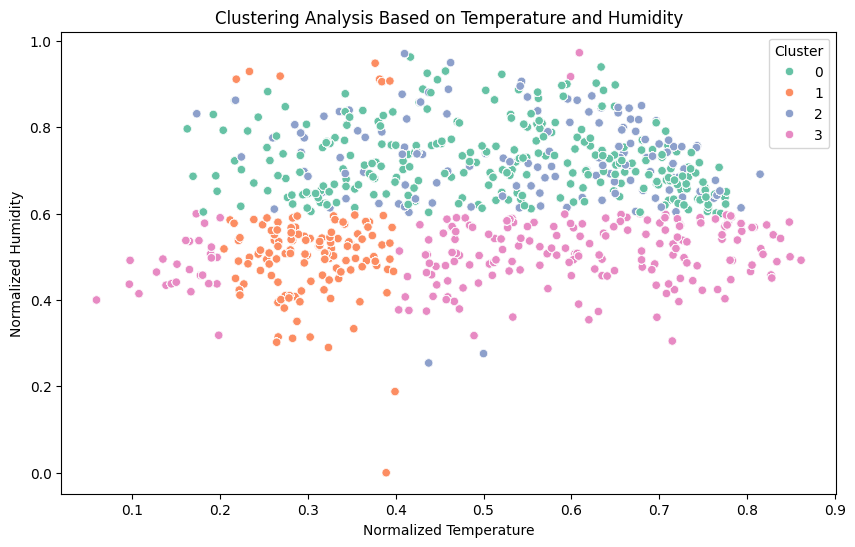

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('all_data.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Define bins and labels for temperature
temp_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
temp_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['temp_binned'] = pd.cut(data['temp_day'], bins=temp_bins, labels=temp_labels)

# Define bins and labels for humidity
hum_bins = [0, 0.3, 0.6, 0.9, 1]
hum_labels = ['Low', 'Medium', 'High', 'Very High']
data['hum_binned'] = pd.cut(data['hum_day'], bins=hum_bins, labels=hum_labels)

# Define bins and labels for windspeed
windspeed_bins = [0, 0.1, 0.2, 0.3, 0.4]
windspeed_labels = ['Calm', 'Light', 'Moderate', 'Strong']
data['windspeed_binned'] = pd.cut(data['windspeed_day'], bins=windspeed_bins, labels=windspeed_labels)

# One-hot encoding for binned features
data_encoded = pd.get_dummies(data[['temp_binned', 'hum_binned', 'windspeed_binned']], drop_first=True)

# Select relevant features for clustering
features = data_encoded.columns.tolist()

# Define number of clusters
num_clusters = 4

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model on the encoded data
kmeans.fit(data_encoded[features])

# Add cluster labels to the original dataframe
data['cluster'] = kmeans.labels_

# Group by cluster and calculate mean values of original features
cluster_analysis = data.groupby('cluster')[['temp_day', 'hum_day', 'windspeed_day', 'cnt_day']].mean()
print(cluster_analysis)

# Visualizing clusters based on temperature and humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_day', y='hum_day', hue='cluster', data=data, palette='Set2')
plt.title('Clustering Analysis Based on Temperature and Humidity')
plt.xlabel('Normalized Temperature')
plt.ylabel('Normalized Humidity')
plt.legend(title='Cluster')
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2